In [3]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
stack_name = "14. 08Oct2019P1"
paras_dir  = "/home/haobo/Documents/UROP2021/"+stack_name+"/paras/"
mask_dir = paras_dir + "mask_with_chamber/"
orig_path = paras_dir + "para{}_new/time{:03d}.png"
# orig_path = paras_dir + '../time{1:03d}/slice{0:03d}time{1:03d}.png'
truth_mask_path = "/home/haobo/Documents/UROP2021/HaoboSeg-onthefly-08Oct2019P1/test_m_new/"
truth_pic_path  = "/home/haobo/Documents/UROP2021/HaoboSeg-onthefly-08Oct2019P1/test_f_new/"


In [5]:
def rotate(image, angle, center=None, scale=1.0):
    # 获取图像尺寸
    (h, w) = image.shape[:2]
 
    # 若未指定旋转中心，则将图像中心设为旋转中心
    if center is None:
        center = (w / 2, h / 2)
 
    # 执行旋转
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
 
    # 返回旋转后的图像
    return rotated

In [6]:
def cut_resize_file(img_mat, cut_size=(512, 512)):
    # 根据最短边进行图像裁剪
    sp = img_mat.shape
    rows = sp[0]  # height(rows) of image
    cols = sp[1]  # width(colums) of image
    if rows >= cols:
        shorter = cols
    else:
        shorter = rows
    cropped = img_mat[0:shorter, 0:shorter]  # 裁剪坐标为[y0:y1, x0:x1]
    new_array = cv2.resize(cropped, cut_size)
    return new_array

In [16]:
# print(mask_dir)
mask_dirs = os.listdir(mask_dir)
masks = []
for f in mask_dirs:
    mask = cv2.imread(mask_dir + f)
    # print(mask)
    if mask is not None:
        # mask //= 127
        mask = np.uint8(cut_resize_file(mask))
        # mask = rotate(mask, 270)
        mask = cv2.flip(mask, 0)
        new_mask = np.zeros(mask.shape, dtype=np.uint8)
        new_mask = np.uint8(mask > 127) + np.uint8(mask==127)*2
        masks.append(new_mask)

0


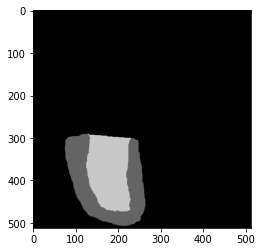

In [18]:
plt.imshow(masks[1]*100)
print(masks[1].min())
plt.show()
cv2.imshow("", masks[1]*100)
cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
for f, mask in zip(mask_dirs, masks):
    f_name = truth_mask_path + stack_name + '_' + f
    print(f_name)
    cv2.imwrite(f_name, mask)

/home/haobo/Documents/UROP2021/HaoboSeg-onthefly-08Oct2019P1/test_m_new/14. 08Oct2019P1_slice016time001.png
/home/haobo/Documents/UROP2021/HaoboSeg-onthefly-08Oct2019P1/test_m_new/14. 08Oct2019P1_slice016time002.png
/home/haobo/Documents/UROP2021/HaoboSeg-onthefly-08Oct2019P1/test_m_new/14. 08Oct2019P1_slice016time003.png
/home/haobo/Documents/UROP2021/HaoboSeg-onthefly-08Oct2019P1/test_m_new/14. 08Oct2019P1_slice016time004.png
/home/haobo/Documents/UROP2021/HaoboSeg-onthefly-08Oct2019P1/test_m_new/14. 08Oct2019P1_slice016time005.png
/home/haobo/Documents/UROP2021/HaoboSeg-onthefly-08Oct2019P1/test_m_new/14. 08Oct2019P1_slice016time006.png
/home/haobo/Documents/UROP2021/HaoboSeg-onthefly-08Oct2019P1/test_m_new/14. 08Oct2019P1_slice016time007.png
/home/haobo/Documents/UROP2021/HaoboSeg-onthefly-08Oct2019P1/test_m_new/14. 08Oct2019P1_slice016time008.png
/home/haobo/Documents/UROP2021/HaoboSeg-onthefly-08Oct2019P1/test_m_new/14. 08Oct2019P1_slice016time009.png
/home/haobo/Documents/UROP20

In [17]:
start_slice =15
end_slice = 21
start_t = 1
end_t = 40

for s in range(start_slice, end_slice + 1):
    for t in range(start_t, end_t + 1):
        print(orig_path.format(s, t))
        pic = cv2.imread(orig_path.format(s, t))
        # pic = pic[40:390, 40:476-30, ...]
        print(pic.shape)
        pic = cut_resize_file(pic)
        # pic = rotate(pic, 270)
        pic = cv2.flip(pic, 0)
        # print(orig_path.format(s, t))
        cv2.imwrite(truth_pic_path \
                  + stack_name + f'_slice{s:03d}time{t:03d}.png', pic)
        # img_w_mask = np.uint8(pic*0.8 + masks[-1]*20)
        # plt.imshow(img_w_mask)
        # plt.show


/home/haobo/Documents/UROP2021/14. 08Oct2019P1/paras/para15_new/time001.png
(398, 435, 3)
/home/haobo/Documents/UROP2021/14. 08Oct2019P1/paras/para15_new/time002.png
(398, 435, 3)
/home/haobo/Documents/UROP2021/14. 08Oct2019P1/paras/para15_new/time003.png
(398, 435, 3)
/home/haobo/Documents/UROP2021/14. 08Oct2019P1/paras/para15_new/time004.png
(398, 435, 3)
/home/haobo/Documents/UROP2021/14. 08Oct2019P1/paras/para15_new/time005.png
(398, 435, 3)
/home/haobo/Documents/UROP2021/14. 08Oct2019P1/paras/para15_new/time006.png
(398, 435, 3)
/home/haobo/Documents/UROP2021/14. 08Oct2019P1/paras/para15_new/time007.png
(398, 435, 3)
/home/haobo/Documents/UROP2021/14. 08Oct2019P1/paras/para15_new/time008.png
(398, 435, 3)
/home/haobo/Documents/UROP2021/14. 08Oct2019P1/paras/para15_new/time009.png
(398, 435, 3)
/home/haobo/Documents/UROP2021/14. 08Oct2019P1/paras/para15_new/time010.png
(398, 435, 3)
/home/haobo/Documents/UROP2021/14. 08Oct2019P1/paras/para15_new/time011.png
(398, 435, 3)
/home/haob

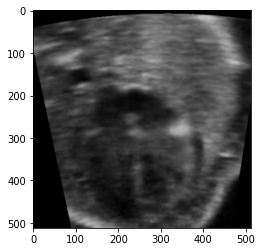

In [18]:
plt.imshow(pic)
plt.show()

In [19]:
print(mask.shape)

(512, 512, 3)


In [20]:

mask = cv2.imread(mask_dir + f)
pic = cv2.imread(orig_path.format(s, t))
print(mask.shape, pic.shape)

(398, 435, 3) (398, 435, 3)


In [37]:
a = cv2.imread("/home/haobo/Documents/UROP2021/HaoboSeg/train_f/06042021P1_1_slice040time005.png")
b = cv2.imread("/home/haobo/Documents/UROP2021/HaoboSeg/train_m/06042021P1_1_slice040time005.png")
a = np.uint8(0.8*a)
a[..., 0] = np.uint8(a[...,0] + b[...,0]*50)
cv2.imshow('', a)
cv2.waitKey()
cv2.destroyAllWindows()